## KING COUNTY HOUSE PRICE PREDICTION

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Importing the Libraries ###

In [245]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [246]:
# Loading the dataset
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Data Understanding ###

In [247]:
#Obtaining the statistical summary of the data set
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [249]:
#Checking for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Data Cleaning ####

In [250]:
df_cleaned = df.drop(['id','date','view','sqft_living15','sqft_lot15','sqft_basement',"sqft_above",'yr_renovated'], axis = 1)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,98144,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004,98027,47.5345,-122.069


The dropped columns are not necessary in our analysis.

In [251]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


In [252]:
df_cleaned.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

In [253]:
# Removing null values for the dataset
df_cleaned = df_cleaned.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    19221 non-null  object 
 8   grade        19221 non-null  object 
 9   yr_built     19221 non-null  int64  
 10  zipcode      19221 non-null  int64  
 11  lat          19221 non-null  float64
 12  long         19221 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


In [254]:
df_cleaned.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Length: 19221, dtype: bool

In [255]:
for val in df_cleaned:
   print(df_cleaned[val].value_counts())
   print()

450000.0    153
350000.0    147
550000.0    144
500000.0    142
425000.0    135
           ... 
225800.0      1
444500.0      1
608250.0      1
418800.0      1
884744.0      1
Name: price, Length: 3391, dtype: int64

3     8721
4     6149
2     2451
5     1441
6      227
1      175
7       35
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    4839
1.00    3411
1.75    2725
2.25    1788
2.00    1722
1.50    1283
2.75    1038
3.00     662
3.50     656
3.25     521
3.75     136
4.00     121
4.50      91
4.25      73
0.75      65
4.75      22
5.00      17
5.25      11
5.50      10
1.25       8
6.00       6
0.50       4
5.75       3
8.00       2
6.25       2
6.75       2
7.75       1
6.50       1
7.50       1
Name: bathrooms, dtype: int64

1300    125
1440    121
1400    120
1820    118
1660    113
       ... 
2905      1
2793      1
4810      1
2665      1
2007      1
Name: sqft_living, Length: 992, dtype: int64

5000     329
6000     253
4000     

In [256]:
# Spliting the grade column to a new column which only has the grade value in numbers.

df_cleaned.loc[:,'grade'] = df_cleaned['grade'].str.split(' ').str[0]

c:\Users\Julius Coredo\anaconda3\envs\learn1-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [257]:
#Changing the data type of grade from str to int
df_cleaned.loc[:, 'grade'] = df_cleaned['grade'].astype(np.int64)


In [258]:
# Changing  catergorical data in the condition column to numeric

# df_cleaned['condition'] = df_cleaned['condition'].map({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
df_cleaned.loc[:,'condition'] = df_cleaned['condition'].map({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,NO,3,7,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,NO,3,6,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,NO,5,7,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,NO,3,8,1987,98074,47.6168,-122.045
5,1230000.0,4,4.50,5420,101930,1.0,NO,3,11,2001,98053,47.6561,-122.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,3,8,2008,98116,47.5773,-122.409
21592,360000.0,3,2.50,1530,1131,3.0,NO,3,8,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,NO,3,8,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,NO,3,7,2009,98144,47.5944,-122.299


In [259]:
# From this we can tell the condition of most houses is average.
df_cleaned['condition'].value_counts()

3    12474
4     5058
5     1512
2      152
1       25
Name: condition, dtype: int64

In [260]:
df_cleaned['waterfront'] = df['waterfront'].replace({'YES': 1, 'NO':0})
df_cleaned.loc[:, 'waterfront'] = df_cleaned['waterfront'].astype(np.int64)

#df_cleaned['waterfront'].value_counts()


<ipython-input-260-c0d8b4c6ebd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['waterfront'] = df['waterfront'].replace({'YES': 1, 'NO':0})
c:\Users\Julius Coredo\anaconda3\envs\learn1-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


This will now make it easier when carrying out statistical measurements.

In [261]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int64  
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
 10  zipcode      19221 non-null  int64  
 11  lat          19221 non-null  float64
 12  long         19221 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


#### Data distribution

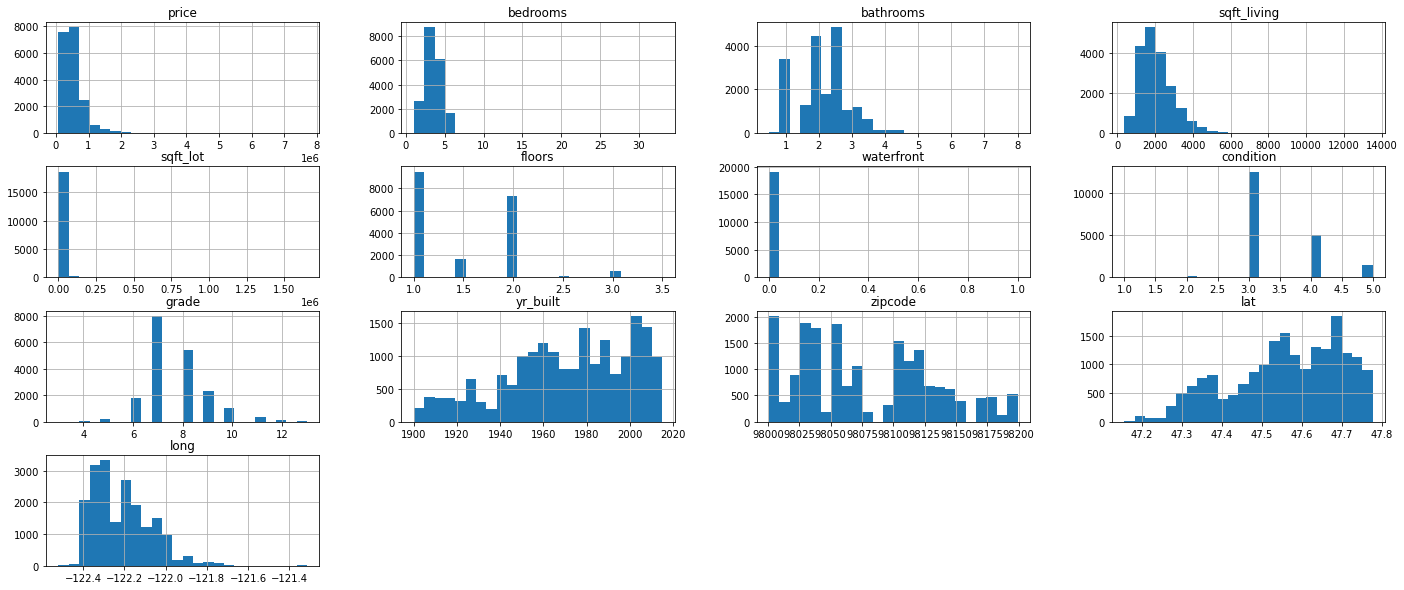

In [262]:
# plotting histograms to visualize patterns in the data
df_cleaned.hist(figsize = (24,10), bins= 24)
plt.show()

## Correlation Matrix
#### Using a heatmap to find out the correlation between the variables of this data set

In [264]:
# Finding out the correlation between the features
df_cleaned.corr()['price']


price          1.000000
bedrooms       0.309651
bathrooms      0.527350
sqft_living    0.704652
sqft_lot       0.087005
floors         0.258277
waterfront     0.276295
condition      0.038037
grade          0.667224
yr_built       0.053525
zipcode       -0.050212
lat            0.305126
long           0.021390
Name: price, dtype: float64

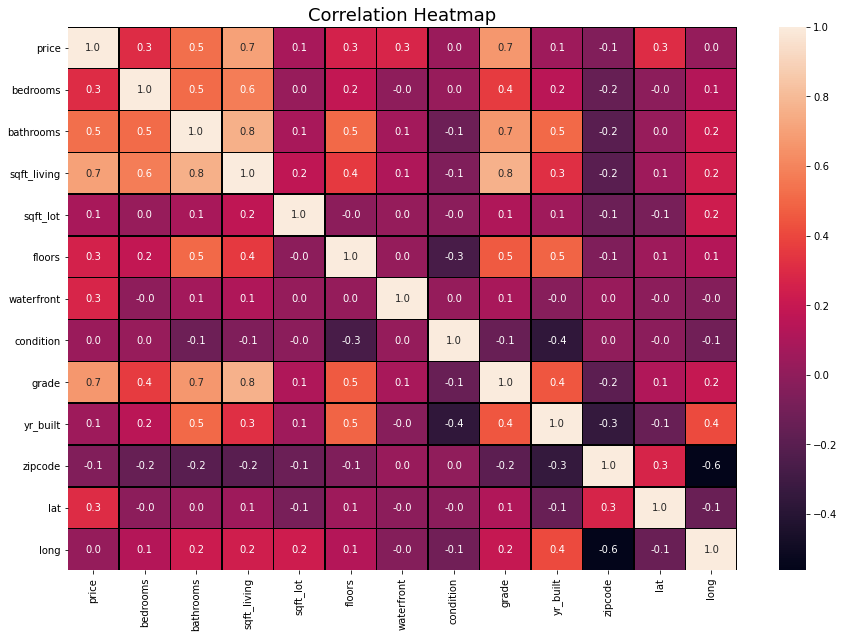

In [265]:
# Plotting a correlation heatmap using seaborn. Border the squares with black color, show the correlation index and round it up.
plt.figure(figsize=(15, 10))  # Set the figure size
sns.heatmap(df_cleaned.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='1.1f')

# Give a title to the map and display it.
plt.title('Correlation Heatmap', size=18)
plt.show()